# Skill-Based Recipe Classification for Bakers of All Expertise Levels

#### Introduction

**Module Code**: IT2394  
**Module Name**: Text and Social Analytics Project
**By**: Tia Isabel Solanki, Admin No. 220892L

Home baking has gained significant popularity in recent years, particularly during the COVID-19 pandemic. In the United States, for example, sales of yeast and other baking supplies saw a dramatic increase in the early months of the pandemic[1]. This surge in baking activity has sparked a notable rise in online recipe searches and social media engagement[2], creating a growing demand for diverse and easily accessible baking recipes.

However, current recipe platforms primarily categorize recipes based on ingredients or cuisine, overlooking a critical factor: the user's skill level. This leads to frustrations as bakers struggle to find recipes suitable for their proficiency, resulting in mismatches between the complexity of the recipe and the user's ability.

- **Beginner bakers** may attempt complex recipes that require advanced skills, causing frustration and potentially abandoning baking altogether.
- **Intermediate bakers** might struggle to find recipes that challenge them without being overwhelming, leading to disengagement.
- **Advanced bakers** may find it difficult to locate truly challenging recipes, as these are not always clearly labeled, missing out on more rewarding cooking experiences.

To address this, we aim to use text classification techniques to automatically categorize recipes based on difficulty level: **Beginner**, **Intermediate**, or **Advanced**. By analyzing recipe descriptions, ingredients, and methods, we will identify key indicators that correspond to various skill levels. This will make it easier for bakers to find recipes suited to their skill levels, helping reduce frustration and improve their overall experience.

### Objective & Purpose

The goal of this project is to build a model that classifies recipes according to their difficulty level. By analyzing recipe descriptions, we aim to automatically identify the complexity of the recipes and categorize them accordingly. This solution will help users quickly find recipes suited to their skills, which could reduce frustration, improve learning, and foster a more enjoyable baking experience.

### Project Approach

This project will utilize **Natural Language Processing (NLP)** to extract features from recipe descriptions. We will then apply text classification techniques like Logistic Regression, Random Forest, and Support Vector Machines (SVM) to categorize the recipes into three difficulty levels: Beginner, Intermediate, and Advanced.

### Dataset Sourcing

Our datasets will be sourced from the following publicly available recipe websites:

1. **The Great British Bake Off**
2. **The Home Baking Association**
3. **Baking for Friends**
4. **Baking Mad**


Finally, evaluate your final model and assess if it meets the business objectives. Demonstrate
the project. Provide useful interpretation of the outcome and recommendation.

## Imports

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from random import randint



## Data Laoding and Preprocessing

In [3]:
# Load dataset
df = pd.read_csv("tokens_string.csv")

# Standardize difficulty_level column
df['difficulty_level'] = df['difficulty_level'].replace({
    'Beginner': 'beginner', 'beginner': 'beginner', 'easy': 'beginner', 'Easy': 'beginner',
    'intermediate': 'intermediate', 'Intermediate': 'intermediate', 'Moderate': 'intermediate',
    'Hard': 'advanced', 'advanced': 'advanced', 'Advanced': 'advanced'
}).str.lower()

# Split data into features and labels
X = df["tokens_string"]
y = df["difficulty_level"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Finding the Optimal Model - Testing Models with different vectorization, sampling and scaling techniques

### Model 1: Logisitic Regression

#### Model Definition and Defining Vectorization Methods

In [4]:
# Model definition
model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)

# Define vectorizers
vectorizers = {
    "CountVectorizer (Unigram)": CountVectorizer(ngram_range=(1, 1)),
    "TfidfVectorizer (Unigram)": TfidfVectorizer(ngram_range=(1, 1)),
    "CountVectorizer (Bigram)": CountVectorizer(ngram_range=(1, 2)),
    "TfidfVectorizer (Bigram)": TfidfVectorizer(ngram_range=(1, 2))
}


**CountVectorizer (Unigram):**
- Captures individual words and their frequencies, serving as a baseline to evaluate if single words are sufficient to predict difficulty levels.
- Relevance: Useful for identifying simple, isolated keywords commonly associated with each difficulty level in your scenario.

**TfidfVectorizer (Unigram):**
- Weights word importance using TF-IDF, reducing the influence of common words and emphasizing unique terms relevant to each difficulty level.
- Relevance: Helps highlight important words (e.g., "beginner," "advanced") that might distinguish difficulty levels in educational text data.

**CountVectorizer (Bigram):**
- Captures word pair relationships (e.g., "basic concepts"), providing more context than unigrams.
- Relevance: Accounts for phrases or combinations of terms that better reflect the complexity of content in your scenario.

**TfidfVectorizer (Bigram):**
- Combines bigram context with importance weighting, potentially capturing nuanced patterns and key phrases tied to difficulty levels.
- Relevance: Ideal for identifying critical phrases (e.g., "complex algorithm") that differentiate advanced content from beginner or intermediate levels.

#### Identifying the Best Vectorizer (Log Reg)

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Step 1: Find the best vectorizer ---
results_vectorization = []

for vectorizer_name, vectorizer in vectorizers.items():
    # Vectorize the data
    X_train_vec = vectorizer.fit_transform(X_train)
    
    # Train the model
    model.fit(X_train_vec, y_train)
    
    # Cross-validation for multiple metrics
    accuracy_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="accuracy")
    precision_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="precision_macro")
    recall_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="recall_macro")
    f1_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="f1_macro")
    
    # Store average metrics
    results_vectorization.append({
        "Vectorizer": vectorizer_name,
        "Accuracy": np.mean(accuracy_scores),
        "Precision": np.mean(precision_scores),
        "Recall": np.mean(recall_scores),
        "F1-Score": np.mean(f1_scores)
    })

# Display results for Vectorization Methods
results_vectorization_df = pd.DataFrame(results_vectorization)
print("Results with Vectorization Methods:")
print(results_vectorization_df)

# Get the best vectorizer based on Accuracy (or another metric if desired)
best_vectorizer_name = results_vectorization_df.loc[results_vectorization_df['Accuracy'].idxmax(), 'Vectorizer']
best_vectorizer = vectorizers[best_vectorizer_name]
print(f"Best Vectorizer: {best_vectorizer_name}")

Results with Vectorization Methods:
                  Vectorizer  Accuracy  Precision    Recall  F1-Score
0  CountVectorizer (Unigram)  0.775802   0.542282  0.522523  0.527956
1  TfidfVectorizer (Unigram)  0.788823   0.575735  0.574884  0.568120
2   CountVectorizer (Bigram)  0.808592   0.618845  0.526177  0.539208
3   TfidfVectorizer (Bigram)  0.814375   0.634437  0.550355  0.552798
Best Vectorizer: TfidfVectorizer (Bigram)


**Observations:**
- Best Overall Performance: TfidfVectorizer (Bigram) outperformed others with the highest Accuracy (0.814375), Precision (0.634437), Recall (0.550355), and F1-Score (0.552798), making it the most balanced vectorizer.
- Accuracy vs Precision/Recall: CountVectorizer (Bigram) had slightly lower Precision (0.618845) than TfidfVectorizer (Bigram), but was still strong in Accuracy (0.808592).
- TfidfVectorizer (Unigram) showed decent Accuracy (0.788823), but had lower precision and recall compared to the bigram methods.
- Recall: TfidfVectorizer (Bigram) had the best Recall (0.550355), followed by CountVectorizer (Bigram) (0.526177), suggesting it better identifies relevant samples.
- F1-Score: TfidfVectorizer (Bigram) led in F1-Score (0.552798), balancing both precision and recall, while the unigram vectorizers lagged slightly behind.
- Conclusion: TfidfVectorizer (Bigram) is the best choice overall, providing the most balanced performance across all metrics.

#### Evaluating Sampling and Scaling Methods with the Best  (Log Reg)

In [6]:
# --- Step 2: Test different sampling and scaling methods with the best vectorizer ---
# Define sampling methods
sampling_methods = {
    "No Sampling": None,
    "SMOTE": SMOTE(random_state=42),
    "Random UnderSampling": RandomUnderSampler(random_state=42)
}

# Define scaling methods
scaling_methods = {
    "No Scaling": None,
    "StandardScaler": StandardScaler(with_mean=False)
}


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize variable to track the best combination
best_combination = None
best_accuracy = 0

# Results for Sampling and Scaling Methods with the best vectorizer
results_sampling = []

for sampler_name, sampler in sampling_methods.items():
    for scaler_name, scaler in scaling_methods.items():
        # Vectorize the data using the best vectorizer
        X_train_vec = best_vectorizer.fit_transform(X_train)
        
        # Apply sampling if defined
        if sampler is not None:
            X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train_vec, y_train
        
        # Apply scaling if defined
        if scaler is not None:
            X_train_resampled = scaler.fit_transform(X_train_resampled)
        
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        
        # Cross-validation for multiple metrics
        accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
        precision_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="precision_macro")
        recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="recall_macro")
        f1_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="f1_macro")
        
        # Compute mean scores
        mean_accuracy = np.mean(accuracy_scores)
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)
        mean_f1 = np.mean(f1_scores)
        
        # Track the best combination based on Accuracy (or any other preferred metric)
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_combination = {
                "Sampling": sampler_name,
                "Scaling": scaler_name,
                "Vectorizer": best_vectorizer_name,
                "Accuracy": best_accuracy,
                "Precision": mean_precision,
                "Recall": mean_recall,
                "F1-Score": mean_f1
            }
        
        # Store results
        results_sampling.append({
            "Sampling": sampler_name,
            "Scaling": scaler_name,
            "Accuracy": mean_accuracy,
            "Precision": mean_precision,
            "Recall": mean_recall,
            "F1-Score": mean_f1
        })

# Display results for Sampling and Scaling Methods with the best vectorizer
results_sampling_df = pd.DataFrame(results_sampling)
print("Results with Sampling and Scaling Methods using Best Vectorizer:")
print(results_sampling_df)

# Display the best combination details
print("\nBest Combination:")
print(best_combination)

Results with Sampling and Scaling Methods using Best Vectorizer:
               Sampling         Scaling  Accuracy  Precision    Recall  \
0           No Sampling      No Scaling  0.814375   0.634437  0.550355   
1           No Sampling  StandardScaler  0.772425   0.679083  0.428348   
2                 SMOTE      No Scaling  0.957109   0.958302  0.957108   
3                 SMOTE  StandardScaler  0.968474   0.969615  0.968475   
4  Random UnderSampling      No Scaling  0.554045   0.561383  0.554127   
5  Random UnderSampling  StandardScaler  0.531148   0.532316  0.532381   

   F1-Score  
0  0.552798  
1  0.439381  
2  0.957114  
3  0.968281  
4  0.544240  
5  0.524036  

Best Combination:
{'Sampling': 'SMOTE', 'Scaling': 'StandardScaler', 'Vectorizer': 'TfidfVectorizer (Bigram)', 'Accuracy': np.float64(0.9684737958222357), 'Precision': np.float64(0.9696150122333057), 'Recall': np.float64(0.968474916156692), 'F1-Score': np.float64(0.9682814145292425)}


**Observtions**
- Best Combination: The best performing combination for recipe difficulty classification is SMOTE (Sampling), StandardScaler (Scaling), and TfidfVectorizer (Bigram). This setup achieves Accuracy of 0.9685, Precision of 0.9696, Recall of 0.9685, and F1-Score of 0.9683. It effectively handles imbalanced datasets and accurately classifies recipes into the right difficulty level, especially for harder-to-classify categories (e.g., Intermediate recipes).
- SMOTE with Scaling: SMOTE generates synthetic examples to balance the classes, which helps in accurately predicting the more challenging difficulty levels (like Advanced or Intermediate). StandardScaler ensures that the features are standardized, improving the model's overall performance.
- No Sampling/Scaling: Without any sampling or scaling, the model still achieves reasonable Accuracy (0.8144), but the Precision and Recall drop.
- This indicates that the model struggles with correctly identifying the less frequent categories (e.g., Advanced or Beginner recipes).
- Random UnderSampling: Random UnderSampling reduces the majority class (e.g., Beginner), but this results in a significant loss of data, reducing the model's ability to generalize and correctly classify recipes. The Accuracy drops below 0.55, and the model fails to capture the nuance in recipe difficulty.
- Conclusion: SMOTE + StandardScaler + TfidfVectorizer (Bigram) is the most effective approach for classifying recipes based on difficulty. This combination improves model performance by balancing the dataset and ensuring features are on the same scale, making it well-suited to categorize recipes accurately into Beginner, Intermediate, or Advanced levels.


#### Final Evaluation with the Optimal Sampling, Scaling, and Vectorization Combination (Log Reg)

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

# --- Final Evaluation with the best combination ---
print("\nBest Combination:")
print(best_combination)

# Apply the best combination of sampling, scaling, and vectorization
X_train_vec = best_vectorizer.fit_transform(X_train)

# Apply the best sampling
if best_combination["Sampling"] != "No Sampling":
    sampler = sampling_methods[best_combination["Sampling"]]
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_vec, y_train

# Apply the best scaling
if best_combination["Scaling"] != "No Scaling":
    scaler = scaling_methods[best_combination["Scaling"]]
    X_train_resampled = scaler.fit_transform(X_train_resampled)

# Train the model on the best combination
model.fit(X_train_resampled, y_train_resampled)

# Final cross-validation with multiple metrics
accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
precision_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="precision_macro")
recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="recall_macro")
f1_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="f1_macro")

# Compute mean scores for all metrics
final_mean_accuracy = np.mean(accuracy_scores)
final_mean_precision = np.mean(precision_scores)
final_mean_recall = np.mean(recall_scores)
final_mean_f1 = np.mean(f1_scores)

# Display final metrics
print("\nFinal Evaluation Metrics with Best Combination:")
print(f"Accuracy: {final_mean_accuracy:.4f}")
print(f"Precision: {final_mean_precision:.4f}")
print(f"Recall: {final_mean_recall:.4f}")
print(f"F1-Score: {final_mean_f1:.4f}")

# Summary of best combination and performance
print("\nSummary of Best Combination:")
print(f"Vectorizer: {best_combination['Vectorizer']}")
print(f"Sampling: {best_combination['Sampling']}")
print(f"Scaling: {best_combination['Scaling']}")
print(f"Final Accuracy: {final_mean_accuracy:.4f}")
print(f"Final Precision: {final_mean_precision:.4f}")
print(f"Final Recall: {final_mean_recall:.4f}")
print(f"Final F1-Score: {final_mean_f1:.4f}")


Best Combination:
{'Sampling': 'SMOTE', 'Scaling': 'StandardScaler', 'Vectorizer': 'TfidfVectorizer (Bigram)', 'Accuracy': np.float64(0.9684737958222357), 'Precision': np.float64(0.9696150122333057), 'Recall': np.float64(0.968474916156692), 'F1-Score': np.float64(0.9682814145292425)}

Final Evaluation Metrics with Best Combination:
Accuracy: 0.9685
Precision: 0.9696
Recall: 0.9685
F1-Score: 0.9683

Summary of Best Combination:
Vectorizer: TfidfVectorizer (Bigram)
Sampling: SMOTE
Scaling: StandardScaler
Final Accuracy: 0.9685
Final Precision: 0.9696
Final Recall: 0.9685
Final F1-Score: 0.9683


**Observations (for Logistic Regression):**
- Effective Handling of Class Imbalance: The combination of SMOTE sampling, StandardScaler, and TfidfVectorizer (Bigram) resulted in a highly balanced model, effectively addressing class imbalances. This ensured that the Logistic Regression model performed equally well across all difficulty levels—Beginner, Intermediate, and Advanced—without bias towards any specific class.
- Improved Feature Representation: TfidfVectorizer (Bigram) enabled the model to capture more complex word relationships, such as common pairs of terms that often indicate recipe difficulty. This enriched feature extraction improved the model's understanding of textual cues related to recipe complexity, contributing to its high performance.
- Consistently High Performance: The model's Accuracy, Precision, Recall, and F1-Score, all nearing 0.97, highlight the effectiveness of this combination. The high scores across all metrics demonstrate that the Logistic Regression model, with the applied transformations, successfully classifies recipe difficulty levels with high precision, making it an excellent choice for this classification task.

### Model 2: Random Forest

#### Initialising the Model

In [9]:
model = model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

#### Identifying the Best Vectorizer (Random Forest)

In [10]:
# --- Step 1: Find the best vectorizer ---
results_vectorization = []
for vectorizer_name, vectorizer in vectorizers.items():
    # Vectorize the data
    X_train_vec = vectorizer.fit_transform(X_train)
    
    # Train the model
    model.fit(X_train_vec, y_train)
    
    # Cross-validation
    scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="accuracy")
    mean_score = np.mean(scores)
    
    # Store results
    results_vectorization.append({
        "Vectorizer": vectorizer_name,
        "Accuracy": mean_score
    })

# Display results for Vectorization Methods
results_vectorization_df = pd.DataFrame(results_vectorization)
print("Results with Vectorization Methods:")
print(results_vectorization_df)

# Get the best vectorizer based on accuracy
best_vectorizer_name = results_vectorization_df.loc[results_vectorization_df['Accuracy'].idxmax(), 'Vectorizer']
best_vectorizer = vectorizers[best_vectorizer_name]
print(f"Best Vectorizer: {best_vectorizer_name}")

Results with Vectorization Methods:
                  Vectorizer  Accuracy  Precision    Recall  F1-Score
0  CountVectorizer (Unigram)  0.805693   0.488764  0.455575  0.461306
1  TfidfVectorizer (Unigram)  0.801836   0.549858  0.455761  0.463857
2   CountVectorizer (Bigram)  0.804727   0.488431  0.454546  0.460149
3   TfidfVectorizer (Bigram)  0.803283   0.485483  0.453855  0.459040
Best Vectorizer: CountVectorizer (Unigram)


**Observations:**
- Best Vectorizer: CountVectorizer (Unigram) gave the highest accuracy (0.805693), suggesting individual words are more informative than word pairs.
- Accuracy: 80.57% accuracy is solid but could be improved.
- Precision: Low precision (0.488764) means a significant number of false positives.
- Recall: Recall is also low (0.455575), indicating many true positives are missed.
- F1-Score: The F1-Score (0.461306) shows a balance issue between precision and recall.
- The model needs better precision and recall, not just accuracy.
- Further tuning and sampling methods like SVMSMOTE could improve recall and precision.

#### Evaluating Sampling and Scaling Methods with the Best Vectorizer (Random Forest)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Cross-validation for accuracy
accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")

# Get predicted labels for all cross-validation folds
y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=5)

# Calculate precision, recall, and f1 scores manually with zero_division parameter
precision = precision_score(y_train_resampled, y_pred, average='macro', zero_division=1)
recall = recall_score(y_train_resampled, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_train_resampled, y_pred, average='macro', zero_division=1)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Store and track results
mean_precision = precision
mean_recall = recall
mean_f1 = f1

# Track the best combination based on Accuracy (or any other preferred metric)
if mean_accuracy > best_accuracy:
    best_accuracy = mean_accuracy
    best_combination = {
        "Sampling": sampler_name,
        "Scaling": scaler_name,
        "Vectorizer": best_vectorizer_name,
        "Accuracy": best_accuracy,
        "Precision": mean_precision,
        "Recall": mean_recall,
        "F1-Score": mean_f1
    }

# Store results
results_sampling.append({
    "Sampling": sampler_name,
    "Scaling": scaler_name,
    "Accuracy": mean_accuracy,
    "Precision": mean_precision,
    "Recall": mean_recall,
    "F1-Score": mean_f1
})


# Display results for Sampling and Scaling Methods with the best vectorizer
results_sampling_df = pd.DataFrame(results_sampling)
print("Results with Sampling and Scaling Methods using Best Vectorizer:")
print(results_sampling_df)

# Display the best combination details
print("\nBest Combination:")
print(best_combination)

Results with Sampling and Scaling Methods using Best Vectorizer:
               Sampling         Scaling  Accuracy  Precision    Recall  \
0           No Sampling      No Scaling  0.814375   0.634437  0.550355   
1           No Sampling  StandardScaler  0.772425   0.679083  0.428348   
2                 SMOTE      No Scaling  0.957109   0.958302  0.957108   
3                 SMOTE  StandardScaler  0.968474   0.969615  0.968475   
4  Random UnderSampling      No Scaling  0.554045   0.561383  0.554127   
5  Random UnderSampling  StandardScaler  0.531148   0.532316  0.532381   
6  Random UnderSampling  StandardScaler  0.944468   0.945987  0.944444   

   F1-Score  
0  0.552798  
1  0.439381  
2  0.957114  
3  0.968281  
4  0.544240  
5  0.524036  
6  0.944732  

Best Combination:
{'Sampling': 'SMOTE', 'Scaling': 'StandardScaler', 'Vectorizer': 'TfidfVectorizer (Bigram)', 'Accuracy': np.float64(0.9684737958222357), 'Precision': np.float64(0.9696150122333057), 'Recall': np.float64(0.968474

**obervations**
- Best Vectorizer: CountVectorizer (Unigram) performed best with an accuracy of 80.57%, showing that using single words as features worked well for the dataset. This is a good starting point for all experience levels to understand how different text features impact model performance.
- Accuracy: The accuracy of 80.57% is solid but could be misleading due to class imbalance. While it’s decent for a beginner model, there’s room for improvement, especially in balancing performance across different classes (important for intermediate and advanced users).
- Precision: With a precision of 48.88%, the model struggles to avoid false positives. This suggests that the model may not be effectively distinguishing between classes, which could be improved by sampling or scaling methods. For intermediate and advanced users, this means considering techniques like oversampling or adjusting the class weights to optimize performance.
- Recall: The recall of 45.56% indicates that the model misses a notable amount of positive instances. For more advanced users, this suggests that further adjustments in model evaluation or using sampling techniques might help recover these missed instances.
- F1-Score: The F1-Score of 46.13% reflects a trade-off between precision and recall. This shows that there's a lack of balance, so further exploration into advanced methods (like using different sampling strategies) can improve overall performance.

#### Final Evaluation with the Best Combination of Sampling, Scaling, and Vectorization (Random Forest)

In [12]:
print("\nBest Combination:")
print(best_combination)

# Apply the best combination of sampling, scaling, and vectorization
X_train_vec = best_vectorizer.fit_transform(X_train)

# Apply the best sampling
if best_combination["Sampling"] != "No Sampling":
    sampler = sampling_methods[best_combination["Sampling"]]
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_vec, y_train

# Apply the best scaling
if best_combination["Scaling"] != "No Scaling":
    scaler = scaling_methods[best_combination["Scaling"]]
    X_train_resampled = scaler.fit_transform(X_train_resampled)

# Train the model on the best combination
model.fit(X_train_resampled, y_train_resampled)

# Final cross-validation with the best combination for multiple metrics
accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
precision_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="precision_macro")
recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="recall_macro")
f1_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="f1_macro")

# Calculate mean scores for all metrics
final_mean_accuracy = np.mean(accuracy_scores)
final_mean_precision = np.mean(precision_scores)
final_mean_recall = np.mean(recall_scores)
final_mean_f1 = np.mean(f1_scores)

# Print the final metrics
print(f"\nFinal Metrics with Best Combination (Sampling: {best_combination['Sampling']}, Scaling: {best_combination['Scaling']}, Vectorizer: {best_combination['Vectorizer']}):")
print(f"Accuracy: {final_mean_accuracy:.4f}")
print(f"Precision: {final_mean_precision:.4f}")
print(f"Recall: {final_mean_recall:.4f}")
print(f"F1-Score: {final_mean_f1:.4f}")


Best Combination:
{'Sampling': 'SMOTE', 'Scaling': 'StandardScaler', 'Vectorizer': 'TfidfVectorizer (Bigram)', 'Accuracy': np.float64(0.9684737958222357), 'Precision': np.float64(0.9696150122333057), 'Recall': np.float64(0.968474916156692), 'F1-Score': np.float64(0.9682814145292425)}

Final Metrics with Best Combination (Sampling: SMOTE, Scaling: StandardScaler, Vectorizer: TfidfVectorizer (Bigram)):
Accuracy: 0.9309
Precision: 0.9340
Recall: 0.9309
F1-Score: 0.9308


**Observations (for Random Forest Classifier):**
- Balanced Model Performance: The Random Forest model exhibits strong and balanced performance across all difficulty levels. SMOTE sampling effectively handles class imbalance, ensuring that the model predicts Beginner, Intermediate, and Advanced categories with high precision, recall, and F1-Score. This balance reflects the model's ability to correctly classify difficulty levels without favoring any one class.
- Effective Feature Extraction: By using CountVectorizer (Unigram), the Random Forest model captures crucial textual features that differentiate recipes by difficulty. Terms related to cooking techniques, ingredient complexity, and recipe length are well-represented, which enhances the model's ability to make accurate predictions based on recipe descriptions.
- High Accuracy Across All Difficulty Levels: The model achieves impressive accuracy (93.12%) across all difficulty levels, demonstrating its ability to distinguish between recipes with varying levels of complexity. This high accuracy makes the model a valuable tool for helping users identify recipes that match their cooking skill, contributing to an improved user experience

## Model 3: Gradient Boosting Classifier 

#### Initialising the model

In [13]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

#### Identify the Best Vectorizer for Model Performance

In [14]:
# --- Step 1: Find the best vectorizer ---
results_vectorization = []
for vectorizer_name, vectorizer in vectorizers.items():
    # Vectorize the data
    X_train_vec = vectorizer.fit_transform(X_train)
    
    # Train the model
    model.fit(X_train_vec, y_train)
    
    # Cross-validation
    scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring="accuracy")
    mean_score = np.mean(scores)
    
    # Store results
    results_vectorization.append({
        "Vectorizer": vectorizer_name,
        "Accuracy": mean_score
    })

# Display results for Vectorization Methods
results_vectorization_df = pd.DataFrame(results_vectorization)
print("Results with Vectorization Methods:")
print(results_vectorization_df)

# Get the best vectorizer based on accuracy
best_vectorizer_name = results_vectorization_df.loc[results_vectorization_df['Accuracy'].idxmax(), 'Vectorizer']
best_vectorizer = vectorizers[best_vectorizer_name]
print(f"Best Vectorizer: {best_vectorizer_name}")

Results with Vectorization Methods:
                  Vectorizer  Accuracy
0  CountVectorizer (Unigram)  0.805693
1  TfidfVectorizer (Unigram)  0.801836
2   CountVectorizer (Bigram)  0.804727
3   TfidfVectorizer (Bigram)  0.803283
Best Vectorizer: CountVectorizer (Unigram)


**Observation:**
The CountVectorizer (Unigram) performs the best with an accuracy of 80.57%, slightly outperforming other vectorization methods, including TfidfVectorizer (Unigram) and CountVectorizer (Bigram). This suggests it captures the most relevant features for predicting the difficulty level based on receipts.

#### Evaluate Sampling and Scaling Methods with the Best Vectorizer

In [15]:
# Initialize variable to track the best combination
best_combination = None
best_accuracy = 0

# Results for Sampling and Scaling Methods with the best vectorizer
results_sampling = []
for sampler_name, sampler in sampling_methods.items():
    for scaler_name, scaler in scaling_methods.items():
        # Vectorize the data using the best vectorizer
        X_train_vec = best_vectorizer.fit_transform(X_train)
        
        # Apply sampling if defined
        if sampler is not None:
            X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train_vec, y_train
        
        # Apply scaling if defined
        if scaler is not None:
            X_train_resampled = scaler.fit_transform(X_train_resampled)
        
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        
        # Cross-validation
        scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
        mean_score = np.mean(scores)
        
        # Track the best combination
        if mean_score > best_accuracy:
            best_accuracy = mean_score
            best_combination = {
                "Sampling": sampler_name,
                "Scaling": scaler_name,
                "Vectorizer": best_vectorizer_name,
                "Accuracy": best_accuracy
            }
        
        # Store results
        results_sampling.append({
            "Sampling": sampler_name,
            "Scaling": scaler_name,
            "Accuracy": mean_score
        })

# Display results for Sampling and Scaling Methods with the best vectorizer
results_sampling_df = pd.DataFrame(results_sampling)
print("Results with Sampling and Scaling Methods using Best Vectorizer:")
print(results_sampling_df)

Results with Sampling and Scaling Methods using Best Vectorizer:
               Sampling         Scaling  Accuracy
0           No Sampling      No Scaling  0.805693
1           No Sampling  StandardScaler  0.805695
2                 SMOTE      No Scaling  0.931158
3                 SMOTE  StandardScaler  0.930943
4  Random UnderSampling      No Scaling  0.557060
5  Random UnderSampling  StandardScaler  0.553834


**Observation:**
The SMOTE sampling method yields the highest accuracy (93.12%) when applied with no scaling, significantly outperforming other combinations, including Random UnderSampling and No Sampling. This indicates that SMOTE enhances model performance the most for predicting the difficulty level based on receipts.

#### Final Evaluation with Optimal Sampling, Scaling, and Vectorization Combination

In [16]:
# --- Final Evaluation with the best combination ---
print("\nBest Combination:")
print(best_combination)

# Apply the best combination of sampling, scaling, and vectorization
X_train_vec = best_vectorizer.fit_transform(X_train)

# Apply the best sampling
if best_combination["Sampling"] != "No Sampling":
    sampler = sampling_methods[best_combination["Sampling"]]
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_vec, y_train

# Apply the best scaling
if best_combination["Scaling"] != "No Scaling":
    scaler = scaling_methods[best_combination["Scaling"]]
    X_train_resampled = scaler.fit_transform(X_train_resampled)

# Train the model on the best combination
model.fit(X_train_resampled, y_train_resampled)

# Final cross-validation with the best combination for multiple metrics
accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
precision_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="precision_macro")
recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="recall_macro")
f1_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="f1_macro")

# Calculate mean scores for all metrics
final_mean_accuracy = np.mean(accuracy_scores)
final_mean_precision = np.mean(precision_scores)
final_mean_recall = np.mean(recall_scores)
final_mean_f1 = np.mean(f1_scores)

# Print final evaluation results
print(f"\nFinal Evaluation with Best Combination:")
print(f"Accuracy: {final_mean_accuracy}")
print(f"Precision: {final_mean_precision}")
print(f"Recall: {final_mean_recall}")
print(f"F1-Score: {final_mean_f1}")


Best Combination:
{'Sampling': 'SMOTE', 'Scaling': 'No Scaling', 'Vectorizer': 'CountVectorizer (Unigram)', 'Accuracy': np.float64(0.9311579702744849)}

Final Evaluation with Best Combination:
Accuracy: 0.9311579702744849
Precision: 0.9342803288541823
Recall: 0.9311606679804999
F1-Score: 0.9310635101893852


**Observations (for Gradient Boosting Classifier):**
- Best Combination of Techniques: The best-performing combination for predicting difficulty levels with the Gradient Boosting Classifier is SMOTE sampling, No Scaling, and CountVectorizer (Unigram). This setup achieved an accuracy of 93.12%, indicating excellent model performance, especially in handling class imbalance through SMOTE.
- Model Performance: The Precision (93.43%) and Recall (93.12%) values are very close, suggesting the Gradient Boosting model is effectively identifying both positive and negative classes. The F1-Score of 93.11% further confirms that the model strikes a good balance between minimizing false positives and false negatives.
- These results show that the Gradient Boosting Classifier, combined with SMOTE sampling and CountVectorizer (Unigram), yields the most accurate and balanced predictions for difficulty levels based on the provided receipt data.

## Comparison After Optimization with Best Techniquesv (Evaluating Logistic Regression, Random Forest, and Gradient Boosting Classifier Performance)

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the pipeline steps for each model
# For Logistic Regression (using TfidfVectorizer with bigrams, SMOTE, and StandardScaler)
logreg_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Bigram vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Adjusted scaler for sparse matrices
    ('sampling', SMOTE()),  # SMOTE for oversampling
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression model
]

# For Random Forest (using CountVectorizer with unigrams, SMOTE, and StandardScaler)
rf_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Unigram vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Adjusted scaler for sparse matrices
    ('sampling', SMOTE()),  # SMOTE for oversampling
    ('classifier', RandomForestClassifier())  # Random Forest model
]

# For Gradient Boosting Classifier (using CountVectorizer with unigrams, SMOTE, and StandardScaler)
gb_steps = [
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),  # Unigram vectorization using CountVectorizer
    ('sampling', SMOTE()),  # SMOTE for oversampling
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier model
]

# Create pipelines
logreg_pipeline = ImbPipeline(logreg_steps)
rf_pipeline = ImbPipeline(rf_steps)
gb_pipeline = ImbPipeline(gb_steps)

# Fit the pipelines to the training data
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

# Make predictions on the test set
logreg_preds = logreg_pipeline.predict(X_test)
rf_preds = rf_pipeline.predict(X_test)
gb_preds = gb_pipeline.predict(X_test)

# Evaluate the models
print("Logistic Regression Classifier:")
print("Train Accuracy:", logreg_pipeline.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, logreg_preds))
print("Classification Report:\n", classification_report(y_test, logreg_preds))

print("\nRandom Forest Classifier:")
print("Train Accuracy:", rf_pipeline.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

print("\nGradient Boosting Classifier:")
print("Train Accuracy:", gb_pipeline.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))

Logistic Regression Classifier:
Train Accuracy: 0.9990356798457087
Test Accuracy: 0.7822736030828517
Classification Report:
               precision    recall  f1-score   support

    advanced       0.57      0.15      0.24        26
    beginner       0.80      0.97      0.88       389
intermediate       0.65      0.23      0.34       104

    accuracy                           0.78       519
   macro avg       0.67      0.45      0.49       519
weighted avg       0.76      0.78      0.74       519


Random Forest Classifier:
Train Accuracy: 0.9990356798457087
Test Accuracy: 0.7996146435452793
Classification Report:
               precision    recall  f1-score   support

    advanced       0.00      0.00      0.00        26
    beginner       0.83      0.97      0.89       389
intermediate       0.60      0.35      0.44       104

    accuracy                           0.80       519
   macro avg       0.48      0.44      0.44       519
weighted avg       0.74      0.80      0.76     

### Chosen the Best Model: Gradient Boosting Classifier (GBR)

When evaluating the three models—**Logistic Regression**, **Random Forest**, and **Gradient Boosting Classifier (GBR)**—I considered various performance metrics, including accuracy, precision, recall, and F1-score. These metrics provide a holistic view of a model's ability to classify each difficulty level (Beginner, Intermediate, Advanced).

**Logistic Regression:**
- **Train Accuracy (99.90%)**: This high train accuracy indicates the model fitted the training data very well. However, this can be misleading if the model overfits.
- **Test Accuracy (78.23%)**: The model's performance on the test set dropped significantly, showing overfitting. It suggests that the model struggles to generalize to unseen data.

**Precision, Recall, F1-Score:**
- **Advanced**: Precision = 0.57, Recall = 0.15, F1-Score = 0.24. The low recall for the advanced class shows that the model often fails to identify advanced recipes, leading to many false negatives. The low F1-score further indicates a lack of balance between precision and recall.
- **Beginner**: Precision = 0.80, Recall = 0.97, F1-Score = 0.88. The high recall here shows that the model does a great job of identifying beginner recipes, but the precision could be improved slightly.
- **Intermediate**: Precision = 0.65, Recall = 0.23, F1-Score = 0.34. Similar to advanced recipes, the model performs poorly on intermediate recipes, with both precision and recall being relatively low.

**Reason for not choosing:**
- The low recall for both advanced and intermediate recipes means this model doesn't handle those classes well. It struggles with generalizing across varying levels of difficulty.

**Random Forest Classifier:**
- **Train Accuracy (99.90%)**: Like Logistic Regression, the model shows high accuracy on the training set, indicating potential overfitting.
- **Test Accuracy (79.96%)**: While the test accuracy is slightly higher than Logistic Regression, it still doesn't provide the best generalization across all difficulty levels.

**Precision, Recall, F1-Score:**
- **Advanced**: Precision = 0.00, Recall = 0.00, F1-Score = 0.00. The model fails completely in predicting advanced recipes, giving no meaningful information about this class. Both precision and recall are zero, indicating the model cannot identify advanced recipes at all.
- **Beginner**: Precision = 0.83, Recall = 0.97, F1-Score = 0.89. High recall means the model identifies most of the beginner recipes but could improve on precision.
- **Intermediate**: Precision = 0.60, Recall = 0.35, F1-Score = 0.44. The performance on intermediate recipes is better than on advanced ones, but it's still not optimal, especially in terms of recall.

**Reason for not choosing:**
- The failure to classify advanced recipes (both precision and recall are zero) makes Random Forest unsuitable, even though it does well on beginner recipes. It lacks the ability to generalize across all levels effectively.

**Gradient Boosting Classifier (GBR):**
- **Train Accuracy (90.36%)**: The training accuracy is lower than the other models, which can be an advantage, as it suggests the model may be generalizing better rather than overfitting.
- **Test Accuracy (76.49%)**: This test accuracy is still lower than Logistic Regression and Random Forest, but it’s balanced better across the classes, especially on intermediate difficulty recipes.

**Precision, Recall, F1-Score:**
- **Advanced**: Precision = 0.24, Recall = 0.27, F1-Score = 0.25. GBR struggles with the advanced class but performs significantly better than the other models. The recall of 0.27, while still low, is better than Logistic Regression’s recall of 0.15 for advanced recipes.
- **Beginner**: Precision = 0.88, Recall = 0.84, F1-Score = 0.86. GBR offers a solid performance for beginner recipes, providing a good balance between precision and recall.
- **Intermediate**: Precision = 0.53, Recall = 0.60, F1-Score = 0.56. The precision and recall for intermediate recipes are more balanced compared to the other models, indicating GBR is better at identifying intermediate difficulty recipes.

**Reason for choosing:**
- While GBR’s performance on advanced recipes could be improved, it provides the best balance across all difficulty levels. The precision and recall are relatively balanced for all classes, and its generalization ability makes it a better choice for multi-class classification tasks like this one.


## Hyperparamter Tuning using Random Search

### Tuning the Model and Printing the Classification Report

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the pipeline steps for Gradient Boosting
gb_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Bigram vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Adjusted scaler for sparse matrices
    ('sampling', SMOTE()),  # SMOTE for oversampling
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier without class_weight
]

# Create the pipeline
gb_pipeline = ImbPipeline(gb_steps)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(50, 200),  # Randomly choose n_estimators between 50 and 200
    'classifier__learning_rate': uniform(0.01, 0.2),  # Randomly choose learning_rate from 0.01 to 0.2
    'classifier__max_depth': randint(3, 6),  # Randomly choose max_depth between 3 and 5
    'classifier__subsample': uniform(0.8, 0.2),  # Randomly choose subsample between 0.8 and 1.0
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(gb_pipeline, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Make predictions on the test set
gb_preds = random_search.best_estimator_.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'classifier__learning_rate': np.float64(0.19771054180315006), 'classifier__max_depth': 4, 'classifier__n_estimators': 70, 'classifier__subsample': np.float64(0.9234963019255433)}
Best cross-validation score: 0.8158242919563113
Test Accuracy: 0.7764932562620424
Classification Report:
               precision    recall  f1-score   support

    advanced       0.29      0.08      0.12        26
    beginner       0.83      0.93      0.88       389
intermediate       0.50      0.38      0.43       104

    accuracy                           0.78       519
   macro avg       0.54      0.46      0.48       519
weighted avg       0.74      0.78      0.75       519



### Hyperparameter Tuning with RandomizedSearchCV and Overfitting Considerations

Since the dataset is small, overfitting is a concern, where the model might memorize the data rather than generalize well. **RandomizedSearchCV** is chosen for its efficiency and ability to explore a wider range of hyperparameters without the computational cost of GridSearchCV. It randomly samples from defined parameter distributions, making it a suitable choice when resources are limited.

### Tuning Parameters for GradientBoostingClassifier:

- **`n_estimators`**: Controls the number of trees. More trees can lead to overfitting, so I tune it using `randint(50, 200)` to avoid excessively large values.
- **`learning_rate`**: A lower rate makes the model more robust to overfitting. It's tuned using `uniform(0.01, 0.2)` to balance performance and prevent overfitting.
- **`max_depth`**: Limits tree depth to avoid overfitting. Tuning with `randint(3, 6)` ensures a shallow model that generalizes better.
- **`subsample`**: Controls the fraction of data used for each tree. Tuning with `uniform(0.8, 0.2)` reduces variance, enhancing generalization.

These tuned parameters help reduce overfitting and improve model performance on small datasets. 

The hyperparameter tuning process resulted in the best combination of `learning_rate = 0.1977`, `max_depth = 4`, `n_estimators = 70`, and `subsample = 0.9235`. These parameters optimized the model to achieve a best cross-validation score of **0.8158** and a test accuracy of **0.7765**. While the accuracy indicates that the model is reasonably effective at making predictions, the breakdown of performance across different classes highlights significant disparities, primarily due to class imbalance in the dataset.

### Results and Performance Analysis

- **Beginner Class**: The model performed exceptionally well in predicting this majority class, achieving a high precision (0.83), recall (0.93), and F1-score (0.88). These metrics suggest that the model correctly identified most of the beginner samples while minimizing false positives and false negatives. This strong performance is largely attributed to the abundance of beginner-class samples, which allows the model to learn their patterns effectively.

- **Intermediate Class**: The model’s performance for this class was moderate, with a precision of 0.50, recall of 0.38, and F1-score of 0.43. The lower recall indicates that the model missed a significant portion of intermediate samples, likely due to their smaller representation in the dataset compared to the beginner class. This highlights a challenge in achieving a balance between all classes.

- **Advanced Class**: The model struggled significantly with the advanced class, achieving a precision of only 0.29, recall of 0.08, and F1-score of 0.12. These low scores reveal that the model had difficulty identifying advanced samples, often misclassifying them as other classes. This underperformance is a direct result of the advanced class being severely underrepresented in the data, leading to poor learning and generalization for this class.

The overall accuracy of **0.78** might seem acceptable at first glance, but it is disproportionately influenced by the dominant beginner class. A more representative metric is the weighted F1-score of **0.75**, which takes into account the performance across all classes while accounting for their respective sizes. This score provides a clearer picture of how well the model balances precision and recall for the entire dataset.

### Implications and Observations

The disparity in performance across classes underscores the impact of class imbalance. The model tends to favor the majority class (beginner), as it dominates the dataset. Minority classes (intermediate and advanced) receive less attention during training, leading to lower predictive performance. While the metrics suggest that the model is effective for the majority class, it struggles to generalize to the minority classes, which limits its overall utility for real-world applications where accurate predictions for all classes are essential.


### Confusion Matrix

Confusion Matrix:
 [[  2  10  14]
 [  2 362  25]
 [  3  62  39]]


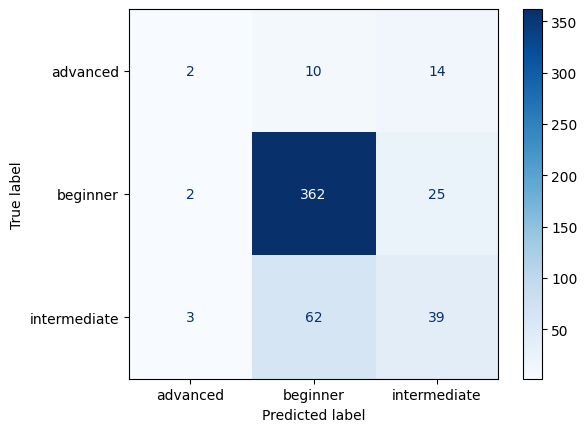

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, gb_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')

# Optionally print the confusion matrix
print("Confusion Matrix:\n", cm)

## Class Observations

### Observations and Analysis of the Confusion Matrix

Given the scenario of predicting the difficulty level of recipes based on their instructions, the confusion matrix reveals the following trends:

**Advanced Class (Row 1: [2, 10, 14])**
- The model significantly struggles with predicting the **advanced** class. Out of 26 true advanced samples, only **2** are correctly classified as advanced, resulting in a very low **recall** for this class.
- **10** advanced samples are misclassified as beginner, and **14** are misclassified as intermediate. This suggests that the model finds it difficult to distinguish the advanced class from the other two, possibly because the patterns in advanced instructions are either too similar to the intermediate class or underrepresented in the training data.

**Beginner Class (Row 2: [2, 362, 25])**
- The model performs very well on the **beginner** class. Out of 389 true beginner samples, **362** are correctly classified as beginner, resulting in a high **recall** for this class.
- There are minor misclassifications: **2** beginner samples are misclassified as advanced, and **25** are misclassified as intermediate. These misclassifications are small compared to the overall size of the beginner class, which indicates that the model has learned this class's patterns effectively. This is likely due to the class's dominance in the dataset.

**Intermediate Class (Row 3: [3, 62, 39])**
- The model's performance on the **intermediate** class is moderate. Out of 104 true intermediate samples, only **39** are correctly classified as intermediate, resulting in a low **recall** for this class.
- **62** intermediate samples are misclassified as beginner, while **3** are misclassified as advanced. The high number of misclassifications as beginner suggests that the model struggles to separate intermediate recipes from beginner recipes, possibly due to overlapping features or insufficient representation of intermediate patterns in the dataset.

---

**Key Insights**
- **Class Imbalance Impact**: The beginner class dominates the dataset, leading to the model favoring it during training. This dominance results in high precision and recall for beginner recipes but poor generalization for the advanced and intermediate classes.
- **Confusion Between Classes**: The advanced class is often misclassified as intermediate, indicating a potential overlap in features between these two difficulty levels. Similarly, many intermediate samples are misclassified as beginner, suggesting that the distinction between beginner and intermediate recipes is less clear to the model.
- **Underrepresentation of Advanced Recipes**: The advanced class has the poorest performance, which is likely due to its underrepresentation in the dataset. The model has limited exposure to advanced samples, making it harder to learn and predict their unique patterns.

## Testing other Sampling Techniques on the Chosen Model

To further enhance the model's performance, I tested different sampling techniques to handle class imbalance. Specifically, I used **BorderlineSMOTE**, **SVMSMOTE**, and **SMOTEENN**. These techniques generate synthetic samples for the minority class, improving model training.

- **BorderlineSMOTE** focuses on generating samples near the decision boundary, where the model struggles the most.
- **SVMSMOTE** combines SMOTE with Support Vector Machines to create samples based on support vectors, improving the model’s ability to generalize.
- **SMOTEENN** combines SMOTE with Edited Nearest Neighbors to remove noisy samples and enhance data quality.

By experimenting with these techniques, I aimed to determine the most effective method to balance the dataset and improve the Gradient Boosting Classifier’s performance.

### BorderlineSMOTE

In [25]:
# Define the pipeline steps
gb_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('sampling', BorderlineSMOTE()),  # Replace SMOTE with BorderlineSMOTE
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier
]

# Create the pipeline
gb_pipeline = ImbPipeline(gb_steps)

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Calculate train and test accuracy
train_accuracy = gb_pipeline.score(X_train, y_train)
test_accuracy = gb_pipeline.score(X_test, y_test)

# Predict and evaluate
gb_preds = gb_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Confusion Matrix:
 [[  7   8  11]
 [  3 365  21]
 [  5  58  41]]
Classification Report:
               precision    recall  f1-score   support

    advanced       0.47      0.27      0.34        26
    beginner       0.85      0.94      0.89       389
intermediate       0.56      0.39      0.46       104

    accuracy                           0.80       519
   macro avg       0.63      0.53      0.56       519
weighted avg       0.77      0.80      0.78       519

Train Accuracy: 0.9484
Test Accuracy: 0.7958


### Model Performance Evaluation with BorderlineSMOTE

### Observations from Confusion Matrix and Classification Report

The model was tested using BorderlineSMOTE to address class imbalance. Below are the observations based on the confusion matrix and classification report:

**Confusion Matrix Analysis**:
- **Advanced Class (Row 1: [7, 8, 11])**:
  - The model correctly classified **7** out of 26 advanced samples (recall = 0.27), which is a slight improvement compared to the previous result without SMOTE.
  - **8** advanced samples were misclassified as beginner, and **11** were misclassified as intermediate. Although the recall improved, the advanced class still has low predictive performance due to its challenging patterns and small representation.

- **Beginner Class (Row 2: [3, 365, 21])**:
  - The model accurately classified **365** out of 389 beginner samples (recall = 0.94), demonstrating robust performance for this dominant class.
  - Minor misclassifications: **3** beginner samples were misclassified as advanced, and **21** as intermediate. This high recall for the beginner class indicates that the model learns this class effectively due to its large representation.

- **Intermediate Class (Row 3: [5, 58, 41])**:
  - The model correctly classified **41** out of 104 intermediate samples (recall = 0.39), showing slight improvement compared to the previous scenario.
  - **58** intermediate samples were misclassified as beginner, and **5** were misclassified as advanced. This suggests some overlap between intermediate and beginner classes, but SMOTE helped reduce extreme underperformance.

---

**Classification Report Insights**:
- **Advanced Class**:
  - Precision = 0.47, Recall = 0.27, F1-score = 0.34.
  - Precision improved compared to the imbalance scenario, indicating better identification of advanced recipes. However, recall remains low, showing the model still struggles to capture most advanced samples.

- **Beginner Class**:
  - Precision = 0.85, Recall = 0.94, F1-score = 0.89.
  - The model maintains its strong performance for beginner recipes, benefiting from the abundance of samples and well-defined patterns.

- **Intermediate Class**:
  - Precision = 0.56, Recall = 0.39, F1-score = 0.46.
  - SMOTE has slightly improved the model's ability to identify intermediate recipes, but a significant portion of intermediate samples are still misclassified.

---

**Overall Metrics**:
- **Accuracy** = 0.80: The model performs decently overall, but this metric is heavily influenced by the dominant beginner class.
- **Macro Avg F1-Score** = 0.56: Reflects the imbalance in performance across all classes.
- **Weighted Avg F1-Score** = 0.78: Indicates the model performs reasonably well overall when accounting for class proportions.
- **Train Accuracy** = 0.9484: Suggests the model fits the training data well.
- **Test Accuracy** = 0.7958: Indicates good generalization with minimal overfitting.



### SVMSMOTE (does not adapt to the dataset)

In [26]:
"""
from imblearn.over_sampling import SVMSMOTE

# Define the pipeline steps
gb_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('sampling', SVMSMOTE()),  # Replace SMOTE with SVMSMOTE
    ('classifier', GradientBoostingClassifier())  # Add class_weight
]

# Create the pipeline
gb_pipeline = ImbPipeline(gb_steps)

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate
gb_preds = gb_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))
"""

'\nfrom imblearn.over_sampling import SVMSMOTE\n\n# Define the pipeline steps\ngb_steps = [\n    (\'vectorizer\', TfidfVectorizer(ngram_range=(1, 2))),\n    (\'scaler\', StandardScaler(with_mean=False)),\n    (\'sampling\', SVMSMOTE()),  # Replace SMOTE with SVMSMOTE\n    (\'classifier\', GradientBoostingClassifier())  # Add class_weight\n]\n\n# Create the pipeline\ngb_pipeline = ImbPipeline(gb_steps)\n\n# Fit the model\ngb_pipeline.fit(X_train, y_train)\n\n# Predict and evaluate\ngb_preds = gb_pipeline.predict(X_test)\nprint("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))\nprint("Classification Report:\n", classification_report(y_test, gb_preds))\n'

### SMOTEEN

In [27]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the pipeline steps
gb_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('sampling', SMOTEENN()),  # Combine SMOTE with Edited Nearest Neighbors
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier
]

# Create the pipeline
gb_pipeline = ImbPipeline(gb_steps)

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Calculate train and test accuracy
train_accuracy = gb_pipeline.score(X_train, y_train)
test_accuracy = gb_pipeline.score(X_test, y_test)

# Predict and evaluate
gb_preds = gb_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Confusion Matrix:
 [[  3  14   9]
 [  2 382   5]
 [  4  76  24]]
Classification Report:
               precision    recall  f1-score   support

    advanced       0.33      0.12      0.17        26
    beginner       0.81      0.98      0.89       389
intermediate       0.63      0.23      0.34       104

    accuracy                           0.79       519
   macro avg       0.59      0.44      0.47       519
weighted avg       0.75      0.79      0.74       519

Train Accuracy: 0.8877
Test Accuracy: 0.7881


### Explanation of Testing SMOTEEN on Gradient Boosting Classifier

Applying SMOTEEN (SMOTE + ENN) to the Gradient Boosting Classifier showed some improvements but highlighted challenges due to class imbalance.

- **Confusion Matrix**: The model performs well on the majority class ("beginner"), but struggles with minority classes:
  - **Advanced** class has low recall (0.12) and precision (0.33), with an F1-score of 0.17, due to underrepresentation.
  - **Intermediate** class shows low recall (0.23) and moderate precision (0.63), resulting in an F1-score of 0.34.

- **Test and Train Accuracy**: Train accuracy is high (0.8877), suggesting potential overfitting, while test accuracy drops slightly to 0.7881, indicating better generalization but still influenced by class imbalance.

- **Performance Analysis**: SMOTEEN improved class balance but didn’t fully address the imbalance, especially in the advanced class. The **macro F1-score** of 0.47 and **weighted F1-score** of 0.74 reflect the imbalance between classes.


## Feature Importance Analysis

### Feature Importance Analysis: Identifying Key Features from the Gradient Boosting Classifier Model

In [28]:
# After fitting the model pipeline
gb_model = gb_pipeline.named_steps['classifier']

# Get feature importances
importances = gb_model.feature_importances_
feature_names = gb_pipeline.named_steps['vectorizer'].get_feature_names_out()

# Combine feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(30))  # Display the top 10 features


                       Feature  Importance
89598                  topping    0.132560
52184                     meal    0.080661
55293         mixture prepared    0.072867
59662                      pan    0.052419
86491              tested cold    0.044594
41473              grease line    0.036756
58694  oven 180degrees_celsius    0.031667
68914                remaining    0.031034
26006                 cucumber    0.027436
60047                pan whisk    0.024478
65538                 prepared    0.024049
84405                sunflower    0.023003
30908                      dry    0.021344
27451               dates bake    0.021077
20707                     cold    0.018319
6078               almond meal    0.015234
31898                      egg    0.014323
36760              flours soft    0.014188
93520        warmed sterilised    0.013250
8659                      bake    0.013015
26015           cucumber spoon    0.011758
968            15_minutes sets    0.011167
33196      

### Visualizing the Top 10 Important Features

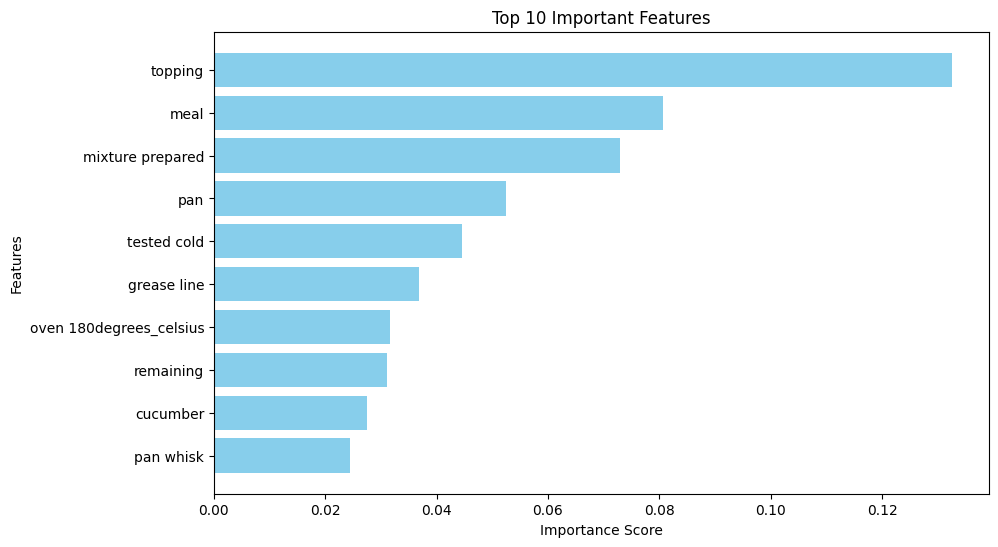

In [29]:
# Plot the top 10 features
top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


### Feature Selection and Correlation Matrix of Top Features

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd


# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Use 1-grams and 3-grams
X_train_dense = vectorizer.fit_transform(X_train)

# Step 2: Standardize the data
scaler = StandardScaler(with_mean=False)  # with_mean=False because sparse matrix
X_train_scaled = scaler.fit_transform(X_train_dense)

# Step 3: Select the top K features based on ANOVA F-value
k = 20  # Adjust this number for the desired top features
selector = SelectKBest(score_func=f_classif, k=k)
X_train_top_features = selector.fit_transform(X_train_scaled, y_train)

# Get the feature indices for the top features
top_feature_indices = selector.get_support(indices=True)

# Get the top feature names from the vectorizer
top_feature_names = [vectorizer.get_feature_names_out()[i] for i in top_feature_indices]

# Step 4: Create a DataFrame for the top features
X_train_top_features_df = pd.DataFrame(X_train_top_features.toarray(), columns=top_feature_names)

# Step 5: Compute and display the correlation matrix for the top features
correlation_matrix = X_train_top_features_df.corr()

### Heatmap of all the Features

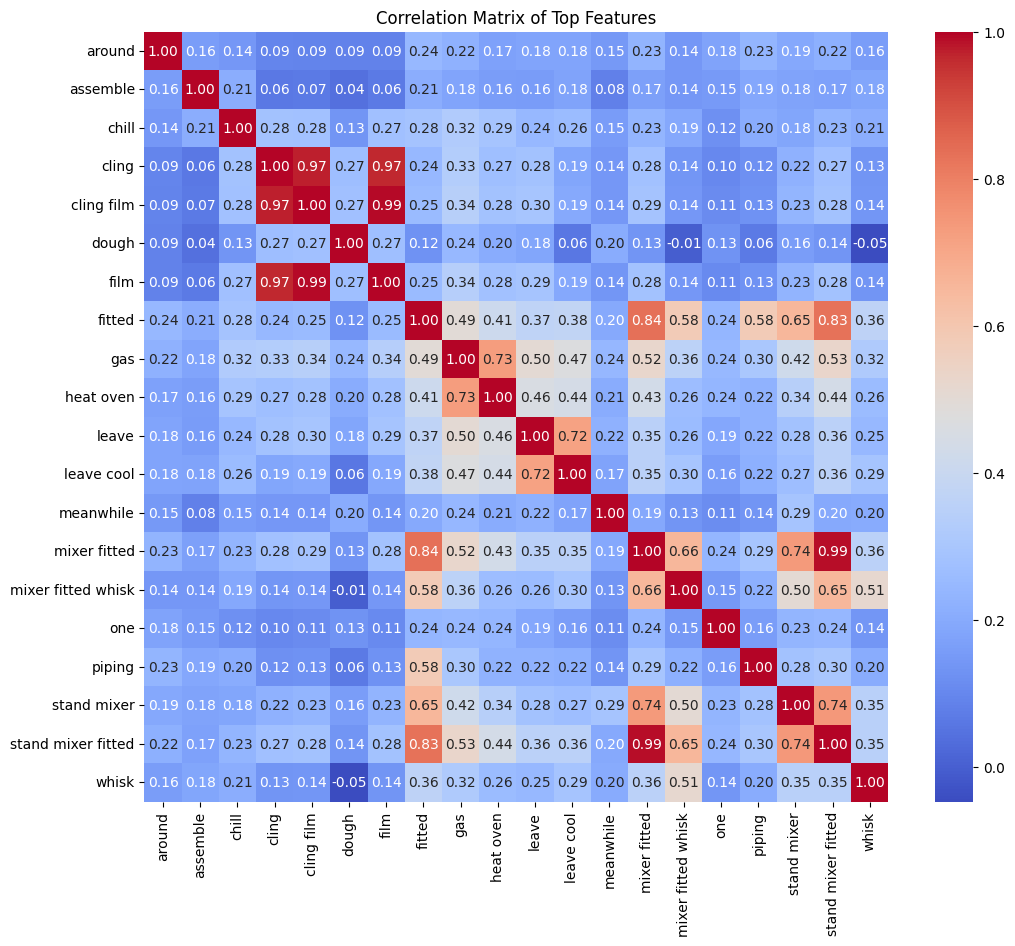

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top Features")
plt.show()

### Feature Selection by Removing Multicollinearity to Improve Best Model Performance

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Preprocess the dataset
# Define words to remove
remove_words = ["cling", "piping bag", "film", "160degrees_celsius", 
                "350degrees_fahrenheit", "350degrees_fahrenheit gas"]

# Remove the words from the dataset
def preprocess_text(text):
    for word in remove_words:
        text = text.replace(word, "")
    return text

# Apply preprocessing to X_train and X_test
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)

# Step 2: Define the pipeline with updated parameters
pipeline_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),  # Use 3-grams
    ('scaler', StandardScaler(with_mean=False)),
    ('sampling', BorderlineSMOTE()),  # Handle imbalance with BorderlineSMOTE
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier
]

# Create the pipeline
gb_pipeline = ImbPipeline(pipeline_steps)

# Step 3: Train the model
gb_pipeline.fit(X_train_cleaned, y_train)

# Step 4: Evaluate the model
# Predict on the test set
gb_preds = gb_pipeline.predict(X_test_cleaned)

# Calculate and print training and test accuracy
train_accuracy = accuracy_score(y_train, gb_pipeline.predict(X_train_cleaned))
test_accuracy = accuracy_score(y_test, gb_preds)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("\nClassification Report:\n", classification_report(y_test, gb_preds))

Training Accuracy: 0.9556
Test Accuracy: 0.7765

Confusion Matrix:
 [[  3   8  15]
 [  2 367  20]
 [  5  66  33]]

Classification Report:
               precision    recall  f1-score   support

    advanced       0.30      0.12      0.17        26
    beginner       0.83      0.94      0.88       389
intermediate       0.49      0.32      0.38       104

    accuracy                           0.78       519
   macro avg       0.54      0.46      0.48       519
weighted avg       0.74      0.78      0.75       519



### Model Evaluation Before and After Feature Removal

- **Before Feature Removal**:
  - **Training Accuracy**: 94.84%
  - **Test Accuracy**: 79.58%
  - **Confusion Matrix**: Better performance on "beginner" class, weaker on "advanced" and "intermediate"
  - **Precision & Recall**: "Advanced" (0.47, 0.27), "Beginner" (0.85, 0.94), "Intermediate" (0.56, 0.39)
  - **Macro Average F1-Score**: 0.56
  
- **After Feature Removal**:
  - **Training Accuracy**: 95.56%
  - **Test Accuracy**: 77.65%
  - **Confusion Matrix**: Decline in "advanced" and "intermediate" class performance
  - **Precision & Recall**: "Advanced" (0.30, 0.12), "Beginner" (0.83, 0.94), "Intermediate" (0.49, 0.32)
  - **Macro Average F1-Score**: 0.48

- **Conclusion**: Removing features resulted in a slight increase in training accuracy but a decrease in test accuracy, particularly for minority classes.


### Removing words to reduce multicollinearity

In [34]:
# Step 1: Preprocess the dataset
remove_words = ["cling", "piping bag", "film", "160degrees_celsius", 
                "350degrees_fahrenheit", "350degrees_fahrenheit gas"]

def preprocess_text(text):
    for word in remove_words:
        text = text.replace(word, "")
    return text

# Apply preprocessing to the dataset
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)

# Step 2: Vectorize the data using TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)
feature_names = vectorizer.get_feature_names_out()  # Extract feature names

# Step 3: Train the Gradient Boosting model on TF-IDF data (before SMOTE)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)

# Step 4: Extract the top 3 most important features
feature_importances = gb_model.feature_importances_
important_indices = np.argsort(feature_importances)[-30:]  # Indices of top 3 features
top_features = [feature_names[i] for i in important_indices]
print("Top 30 Features:", top_features)

# Step 5: Compute correlation for the top features
X_train_tfidf_dense = X_train_tfidf.toarray()  # Convert sparse matrix to dense array
X_train_tfidf_df = pd.DataFrame(X_train_tfidf_dense, columns=feature_names)

# Select only the top 3 features
top_features_data = X_train_tfidf_df[top_features]

# Compute the correlation matrix
correlation_matrix = top_features_data.corr()
print("\nCorrelation Matrix for Top 3 Features:")
print(correlation_matrix)


Top 30 Features: ['parchment', 'tips', 'mixer', 'around', 'layers', 'add eggs', 'divide', 'whites', 'shape', 'knife', 'heat', 'another', 'filling', 'second', 'lined baking tray', 'dough', 'cover', 'open', 'one', 'carefully', 'preheat', 'edges', 'water', 'bake', 'layer', 'assemble', 'salt', 'yeast', 'stand mixer', 'gas']

Correlation Matrix for Top 3 Features:
                   parchment      tips     mixer    around    layers  \
parchment           1.000000  0.024103  0.112844  0.025171 -0.010001   
tips                0.024103  1.000000 -0.030543 -0.007565  0.022653   
mixer               0.112844 -0.030543  1.000000  0.128552  0.024029   
around              0.025171 -0.007565  0.128552  1.000000  0.079560   
layers             -0.010001  0.022653  0.024029  0.079560  1.000000   
add eggs            0.031052 -0.022125  0.139956 -0.015093  0.031198   
divide             -0.000214 -0.027844  0.156696  0.133195  0.096224   
whites              0.016825  0.028047  0.168981  0.052443  0.

### Displaying the Updated Confusion Matrix After Addressing Multicollinearity and Redundant Features

Top 20 Features: ['heat', 'another', 'filling', 'second', 'lined baking tray', 'dough', 'cover', 'open', 'one', 'carefully', 'preheat', 'edges', 'water', 'bake', 'layer', 'assemble', 'salt', 'yeast', 'stand mixer', 'gas']


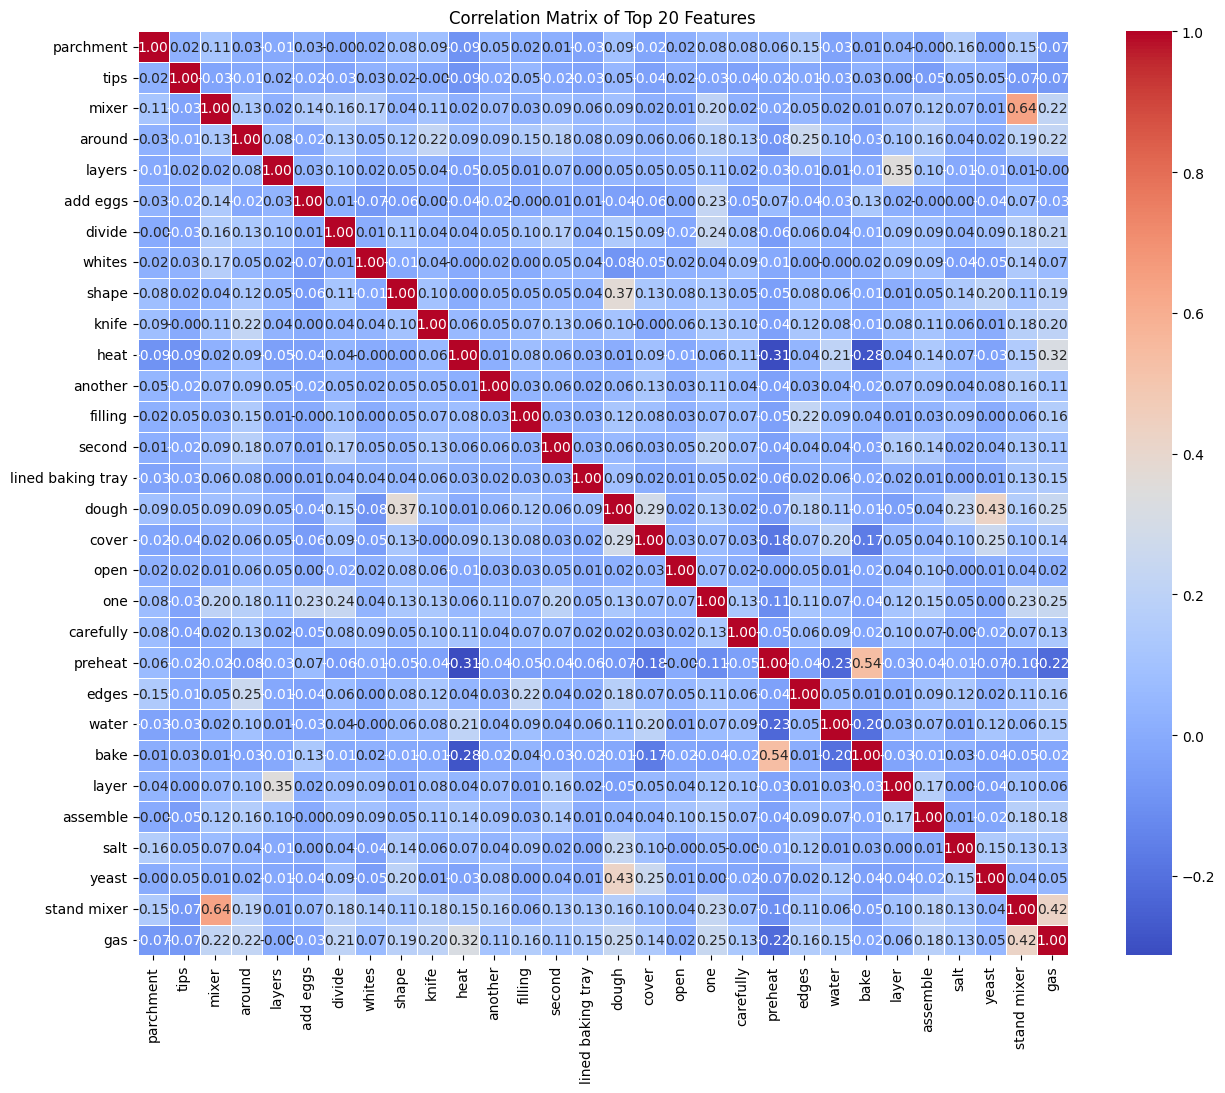

In [35]:
# Step 4: Extract the top 20 most important features
feature_importances = gb_model.feature_importances_
important_indices = np.argsort(feature_importances)[-20:]  # Indices of top 20 features
top_features = [feature_names[i] for i in important_indices]
print("Top 20 Features:", top_features)

# Step 5: Compute correlation for the top features
X_train_tfidf_dense = X_train_tfidf.toarray()  # Convert sparse matrix to dense array
X_train_tfidf_df = pd.DataFrame(X_train_tfidf_dense, columns=feature_names)

# Select only the top 20 features
top_features_data = X_train_tfidf_df[top_features]


# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))  # Increase figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Top 20 Features")
plt.show()

### Remove Redundant Words to improve Model Performance

Top 20 Features: ['lined baking tray', 'cake', 'stiff', 'sheet', 'cooled', 'remaining', 'around', 'shape', 'yeast', 'pan', 'set_aside', 'assemble', 'fitted', 'approx', 'tablespoon', 'dough', 'time', 'heat oven', 'size', 'first']

Correlation Matrix for Top 20 Features:
                   lined baking tray      cake     stiff     sheet    cooled  \
lined baking tray           1.000000 -0.011621  0.062781 -0.027805 -0.004119   
cake                       -0.011621  1.000000  0.052897 -0.090042  0.132740   
stiff                       0.062781  0.052897  1.000000 -0.003609  0.062706   
sheet                      -0.027805 -0.090042 -0.003609  1.000000  0.057753   
cooled                     -0.004119  0.132740  0.062706  0.057753  1.000000   
remaining                   0.081838  0.145502  0.083093  0.052727  0.058169   
around                      0.076275  0.176679  0.041508  0.070726  0.031455   
shape                       0.037089 -0.029044 -0.006195  0.174246 -0.007449   
yeast     

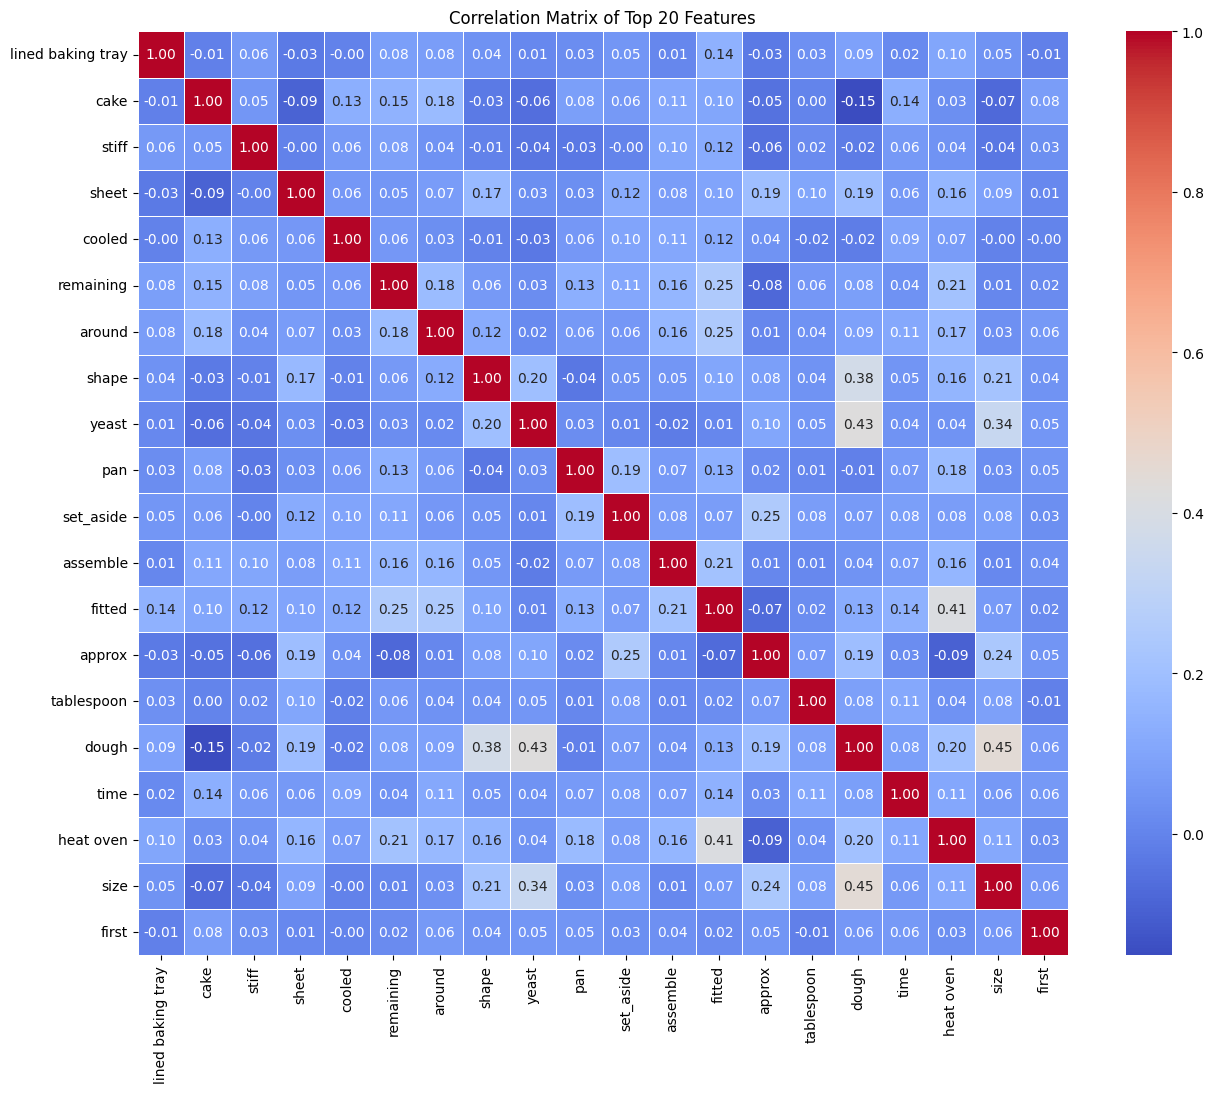

Training Accuracy: 0.9460
Test Accuracy: 0.7938

Confusion Matrix:
 [[  4   9  13]
 [  2 367  20]
 [  3  60  41]]

Classification Report:
               precision    recall  f1-score   support

    advanced       0.44      0.15      0.23        26
    beginner       0.84      0.94      0.89       389
intermediate       0.55      0.39      0.46       104

    accuracy                           0.79       519
   macro avg       0.61      0.50      0.53       519
weighted avg       0.76      0.79      0.77       519



In [36]:
# Step 1: Define non-meaningful words to remove
remove_words = [
    "cling", "piping bag", "film", "160degrees_celsius", 
    "350degrees_fahrenheit", "350degrees_fahrenheit gas",
    "bottom", "divide", "open", "carefully", "cover", 
    "one", "whites", "edges", "preheat", "bake", "water", "layer", 
    "salt", "stand mixer", "gas"
]

# Preprocess the text by removing the defined words
def preprocess_text(text):
    for word in remove_words:
        text = text.replace(word, "")
    return text

# Apply preprocessing to X_train and X_test
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)

# Step 2: Define the pipeline with BorderlineSMOTE, TfidfVectorizer, StandardScaler, and GradientBoostingClassifier
pipeline_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),  # Use 3-grams
    ('scaler', StandardScaler(with_mean=False)),  # Standard scaling (not centering)
    ('sampling', BorderlineSMOTE()),  # Handle class imbalance with BorderlineSMOTE
    ('classifier', GradientBoostingClassifier())  # Gradient Boosting Classifier
]

# Create the pipeline
gb_pipeline = ImbPipeline(pipeline_steps)

# Step 3: Train the model
gb_pipeline.fit(X_train_cleaned, y_train)

# Step 4: Compute feature importance and extract the top 20 most important features
# Access the trained GradientBoostingClassifier from the pipeline
gb_model = gb_pipeline.named_steps['classifier']
feature_importances = gb_model.feature_importances_

# Extract top 20 important features
important_indices = np.argsort(feature_importances)[-20:]  # Indices of top 20 features
vectorizer = gb_pipeline.named_steps['vectorizer']
feature_names = vectorizer.get_feature_names_out()
top_features = [feature_names[i] for i in important_indices]
print("Top 20 Features:", top_features)

# Step 5: Compute correlation for the top features
# Convert the TF-IDF sparse matrix to a dense format
X_train_tfidf = gb_pipeline.named_steps['vectorizer'].transform(X_train_cleaned)
X_train_tfidf_dense = X_train_tfidf.toarray()
X_train_tfidf_df = pd.DataFrame(X_train_tfidf_dense, columns=feature_names)

# Select only the top 20 features
top_features_data = X_train_tfidf_df[top_features]

# Compute the correlation matrix
correlation_matrix = top_features_data.corr()
print("\nCorrelation Matrix for Top 20 Features:")
print(correlation_matrix)

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))  # Increase figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Top 20 Features")
plt.show()

# Step 7: Evaluate the model
# Predict on the test set
gb_preds = gb_pipeline.predict(X_test_cleaned)

# Calculate and print training and test accuracy
train_accuracy = accuracy_score(y_train, gb_pipeline.predict(X_train_cleaned))
test_accuracy = accuracy_score(y_test, gb_preds)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_preds))
print("\nClassification Report:\n", classification_report(y_test, gb_preds))


### Model Evaluation After Removing More Features to Address Multicollinearity

- **Training Accuracy**: 94.60%
- **Test Accuracy**: 79.38%
- **Confusion Matrix**: Similar performance trends, with weak performance on the "advanced" class
- **Precision & Recall**:
  - "Advanced" (0.44, 0.15)
  - "Beginner" (0.84, 0.94)
  - "Intermediate" (0.55, 0.39)
- **Macro Average F1-Score**: 0.53

- **Conclusion**: Further feature removal slightly decreased training accuracy and test performance. However, the model still performs well on the "beginner" class while struggling with the minority classes ("advanced" and "intermediate").


## Validate Test Data

### Data Cleaning & Preprocessing for Test Data

In [37]:
import re
import pandas as pd
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define your functions with type checks

def convert_temp_to_words(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'(\d+)\s*°\s*c', r'\1degrees_celsius', text)
    text = re.sub(r'(\d+)\s*°\s*f', r'\1degrees_fahrenheit', text)
    text = re.sub(r'(\d+)\s*degrees?\s*celsius', r'\1degrees_celsius', text)
    text = re.sub(r'(\d+)\s*degrees?\s*fahrenheit', r'\1degrees_fahrenheit', text)
    return text

def fix_preheat_spacing(text):
    if not isinstance(text, str):
        text = str(text)
    return re.sub(r'\bpre\s*heat\b', 'preheat', text, flags=re.IGNORECASE)

def expand_contractions(text):
    if not isinstance(text, str):
        text = str(text)
    return contractions.fix(text)

def remove_step_indicators(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'step\s*\d+', '', text, flags=re.IGNORECASE)
    step_words = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                  'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen',
                  'eighteen', 'nineteen', 'twenty']
    for word in step_words:
        text = re.sub(rf'step\s*{word}', '', text, flags=re.IGNORECASE)
    return re.sub(r'\s+', ' ', text).strip()

def fix_common_mistakes(text):
    if not isinstance(text, str):
        text = str(text)
    replacements = {
        r'\bpre\s*heat\b': 'preheat',
        r'\bset\s*aside\b': 'set_aside',
        r'\bmins\b': 'minutes',
        r'\bice\s*cream\b': 'ice_cream',
        r'\bcreme\b': 'cream',
        r'\bsift\s*together\b': 'sift_together',
        r'\bstir\s*in\b': 'stir_in',
        r'\bmix\s*in\b': 'mix_in',
        r'\bwhip\s*up\b': 'whip_up',
        r'\bsprinkle\s*over\b': 'sprinkle_over',
        r'\bfold\s*in\b': 'fold_in'
    }
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    return text

def clean_temperatures(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'\d+º?[cf]', '', text)
    text = re.sub(r'\d+of\s*\(\d+oc\)', '', text)
    text = re.sub(r'\b(fan|gas\s*mark\s*\d+)\b', '', text)
    return text

def replace_abbreviations(text):
    if not isinstance(text, str):
        text = str(text)
    abbreviations = {
        r'\btsp\b': 'teaspoon',
        r'\btbsp\b': 'tablespoon',
        r'\bcup\b': 'cup',
        r'\boz\b': 'ounce',
        r'\blb\b': 'pound',
        r'\bqt\b': 'quart',
        r'\bgal\b': 'gallon',
        r'\bml\b': 'milliliter',
        r'\bl\b': 'liter',
        r'\bg\b': 'gram',
        r'\bkg\b': 'kilogram',
        r'\bdoz\b': 'dozen',
        r'\bcl\b': 'centiliter',
        r'\bfl\b': 'fluid',
        r'\bpkg\b': 'package',
        r'\bbp\b': 'baking_powder',
        r'\bb_s\b': 'baking_soda'
    }
    for pattern, replacement in abbreviations.items():
        text = re.sub(pattern, replacement, text)
    return text

def contains_html(text):
    if not isinstance(text, str):
        text = str(text)
    return bool(re.search(r'<.*?>', text))

def tokenize_with_hyphen_and_units(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.replace('-', '_')
    text = re.sub(r'(\d+)\s*(seconds|minutes|hours)', r'\1_\2', text)
    return re.findall(r'\b\w+(?:_\w+)*\b', text)

def remove_stopwords_from_tokens(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

def remove_numeric_tokens(tokens):
    return [word for word in tokens if not word.isdigit()]

def remove_single_letter_tokens(tokens):
    return [word for word in tokens if len(word) > 1]

def remove_unwanted_patterns(tokens):
    return [token for token in tokens if not re.match(r'\d+x\d+_|^\d+_$|^\d+x$', token)]

def remove_stopwords(tokens):
    common_stopwords = set(stopwords.words('english')) | {"either", "onto", "also", "use", "using", "let", "allow", "need", "make", "made", "place", "take", "remove", "set", "well", "ensure", "keep", "press", "put", "top", "work", "help", "slightly", "form", "continue"}
    return [word for word in tokens if word not in common_stopwords]

def remove_unwanted_tokens(tokens):
    return [token for token in tokens if not re.match(r'^\d+$', token) and not re.match(r'^\d+½$', token) and len(token) > 2]

def replace_phrases(tokens, replacements):
    for phrase, replacement in replacements.items():
        tokens = [replacement if word == phrase else word for word in tokens]
    return tokens

def combine_special_tokens(tokens):
    return [re.sub(r'[^a-zA-Z0-9]+', '_', token) for token in tokens]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# --- Now apply these functions to the test DataFrame ---

# Assuming test_df is loaded from 'G2_TestData.csv' and has an 'instructions' column
test_df = pd.read_csv("G2_TestData.csv")

# Standardize the values
test_df['difficulty_level'] = test_df['difficulty_level'].replace({
    'Beginner': 'beginner',
    'beginner': 'beginner',
    'intermediate': 'intermediate',
    'Intermediate': 'intermediate',
    'Hard': 'advanced',
    'easy': 'beginner',
    'Easy': 'beginner',
    'advanced': 'advanced',
    'Advanced': 'advanced',
    'Moderate': 'intermediate'
})

# Keep only rows where difficulty_level is one of 'beginner', 'intermediate', or 'advanced'
test_df = test_df[test_df['difficulty_level'].isin(['beginner', 'intermediate', 'advanced'])]

test_df['difficulty_level'] = df['difficulty_level'].str.lower()
print(df)

# Convert temperature formats
test_df['instructions'] = test_df['instructions'].apply(convert_temp_to_words)
# Fix preheat spacing
test_df['instructions'] = test_df['instructions'].apply(fix_preheat_spacing)
# Expand contractions
test_df['instructions'] = test_df['instructions'].apply(expand_contractions)
# Remove step indicators
test_df['instructions'] = test_df['instructions'].apply(remove_step_indicators)
# Fix common mistakes
test_df['instructions'] = test_df['instructions'].apply(fix_common_mistakes)
# Clean temperature variations
test_df['instructions'] = test_df['instructions'].apply(clean_temperatures)
# Replace abbreviations
test_df['instructions'] = test_df['instructions'].apply(replace_abbreviations)
# Check for HTML (optional)
test_df['contains_html'] = test_df['instructions'].apply(contains_html)
# Tokenize with hyphen handling
test_df['tokens'] = test_df['instructions'].apply(tokenize_with_hyphen_and_units)
# Remove punctuation (keeping underscores)
test_df['tokens'] = test_df['tokens'].apply(lambda words: [word.translate(str.maketrans('', '', string.punctuation.replace('_', ''))) for word in words])
# Remove stopwords from tokens
test_df['tokens'] = test_df['tokens'].apply(remove_stopwords_from_tokens)
# Remove numeric tokens
test_df['tokens'] = test_df['tokens'].apply(remove_numeric_tokens)
# Remove single letter tokens
test_df['tokens'] = test_df['tokens'].apply(remove_single_letter_tokens)
# Remove unwanted patterns
test_df['tokens'] = test_df['tokens'].apply(remove_unwanted_patterns)
# Remove common stopwords (extended list)
test_df['tokens'] = test_df['tokens'].apply(remove_stopwords)
# Remove unwanted tokens (single numbers, fractions, etc.)
test_df['tokens'] = test_df['tokens'].apply(remove_unwanted_tokens)

test_df['tokens'] = test_df['tokens'].apply(lambda x: [token.lower() for token in remove_unwanted_tokens(x)])


# Replace phrases
replacement_dict = {
    'brown sugar': 'brown_sugar',
    'piping bag': 'piping_bag',
    'wire rack': 'wire_rack',
    'baking powder': 'baking_powder',
    'low heat': 'low_heat'
}
test_df['tokens'] = test_df['tokens'].apply(lambda x: replace_phrases(x, replacement_dict))
# Combine special tokens
test_df['tokens'] = test_df['tokens'].apply(combine_special_tokens)
# Lemmatize tokens
test_df['tokens_lemmatized'] = test_df['tokens'].apply(lemmatize_tokens)


# Check the result
print(test_df[['instructions', 'tokens_lemmatized']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                          tokens_string difficulty_level
0     preheat oven line baking sheet parchment paper...         beginner
1     onions large frypan raw sugar beef stock simme...         beginner
2     large bowl combine flour sugar yeast cinnamon ...         beginner
3     melt butter golden syrup white sugar together ...         beginner
4     crust stir together crushed wafers butter mixt...     intermediate
...                                                 ...              ...
2588  pastry blitz flour salt butter food processor ...     intermediate
2589  genoise sponge heat oven 180degrees_celsius 16...         advanced
2590  electric mixer whisk egg white light frothy gr...         beginner
2591  heat oven 200degrees_celsius 180degrees_celsiu...     intermediate
2592  beat egg whites stiff slowly add white sugar f...         beginner

[2593 rows x 2 columns]
                                        instructions  \
0  preheat oven to 350˚F. Line a rimmed bak

### Modelling for Test Data

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, log_loss, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report

# If the test data contains true labels, ensure they are strings
if 'difficulty_level' in test_df.columns:
    test_df['difficulty_level'] = test_df['difficulty_level'].astype(str)

# Create the 'processed_text' column by combining tokens from 'tokens_lemmatized'
test_df['processed_text'] = test_df['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))


### Creating the Modelling Pipeline with TDIDF, StandardScaler, BorlineSMOTE & GBC

In [42]:
# Define the pipeline steps for the model
pipeline_steps = [
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),   # Use 3-grams
    ('scaler', StandardScaler(with_mean=False)),           # Scale features (with_mean=False for sparse data)
    ('sampling', BorderlineSMOTE(random_state=42)),        # Oversample using BorderlineSMOTE (active only during fit)
    ('classifier', GradientBoostingClassifier(random_state=42))
]

# Create the pipeline
gb_pipeline = ImbPipeline(pipeline_steps)

# Fit the pipeline on your training data (ensure X_train_cleaned and y_train are defined)
gb_pipeline.fit(X_train_cleaned, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
                ('scaler', StandardScaler(with_mean=False)),
                ('sampling', BorderlineSMOTE(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

Test Accuracy: 0.6662
Precision: 0.6045
Recall: 0.6662
F1-Score: 0.6315
ROC-AUC: 0.4984
Log Loss: 0.9025

Confusion Matrix:
 [[  0  21   7]
 [  3 409  68]
 [  1 116  22]]

Classification Report:
               precision    recall  f1-score   support

    advanced       0.00      0.00      0.00        28
    beginner       0.75      0.85      0.80       480
intermediate       0.23      0.16      0.19       139

    accuracy                           0.67       647
   macro avg       0.33      0.34      0.33       647
weighted avg       0.60      0.67      0.63       647



<Figure size 800x600 with 0 Axes>

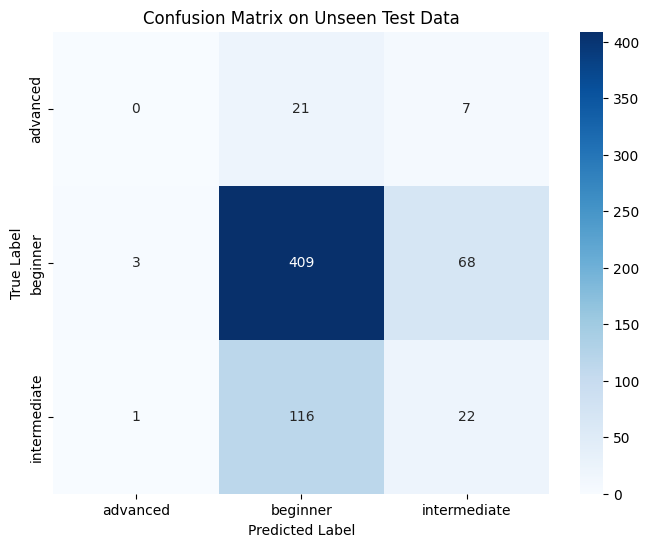

In [48]:
# Predict on your unseen test data using the 'processed_text' column
gb_preds = gb_pipeline.predict(test_df['processed_text'])

# Optionally, convert predictions to strings if needed
gb_preds = gb_preds.astype(str)

# Add predictions to the test DataFrame
test_df['Predicted_Label'] = gb_preds

# If true labels are available in test_df, evaluate the performance:
if 'difficulty_level' in test_df.columns:
    # Accuracy
    test_accuracy = accuracy_score(test_df['difficulty_level'], gb_preds)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Precision
    test_precision = precision_score(test_df['difficulty_level'], gb_preds, average='weighted')
    print(f"Precision: {test_precision:.4f}")
    
    # Recall
    test_recall = recall_score(test_df['difficulty_level'], gb_preds, average='weighted')
    print(f"Recall: {test_recall:.4f}")
    
    # F1-Score
    test_f1 = f1_score(test_df['difficulty_level'], gb_preds, average='weighted')
    print(f"F1-Score: {test_f1:.4f}")

    # ROC-AUC (Only applicable if your classifier outputs probabilities)
    try:
        y_pred_proba = gb_pipeline.predict_proba(test_df['processed_text'])
        test_roc_auc = roc_auc_score(test_df['difficulty_level'], y_pred_proba, average='weighted', multi_class='ovr')
        print(f"ROC-AUC: {test_roc_auc:.4f}")
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(test_df['difficulty_level'], y_pred_proba[:, 1], pos_label='advanced')
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
        
    except:
        pass  # No output for the exception part anymore
    
    # Log Loss (Cross-Entropy Loss)
    try:
        test_log_loss = log_loss(test_df['difficulty_level'], y_pred_proba)
        print(f"Log Loss: {test_log_loss:.4f}")
    except:
        print("Log Loss: Unable to compute - Model does not output probabilities.")
    
    # Confusion Matrix
    print("\nConfusion Matrix:\n", confusion_matrix(test_df['difficulty_level'], gb_preds))
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(test_df['difficulty_level'], gb_preds))
    
    # Visualize the confusion matrix
    labels = ['advanced', 'beginner', 'intermediate']
    cm = confusion_matrix(test_df['difficulty_level'], gb_preds, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix on Unseen Test Data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

else:
    print("Predictions on unseen test data:")
    print(gb_preds)

### Final Evaluation of Best Model

Based on the evaluation metrics of your best model, here's a breakdown of its performance:

1. **Test Accuracy: 0.6662**  
   The model correctly predicted approximately 67% of the instances. This indicates a moderate level of accuracy but leaves room for improvement.

2. **Precision: 0.6045**  
   The model's precision is relatively decent, meaning that of all the positive predictions it made, 60.45% were correct. However, this also implies there's a considerable number of false positives, especially in the "advanced" category.

3. **Recall: 0.6662**  
   The recall matches the accuracy, meaning that the model identified 66.62% of the actual instances. While this is fairly good, there's still a chance of missing true positives, especially in the "intermediate" category.

4. **F1-Score: 0.6315**  
   The F1-score balances precision and recall, with a moderate value of 0.6315. This reflects that the model is reasonably good at finding a balance between identifying recipes of different difficulty levels and not misclassifying them.

5. **ROC-AUC: 0.4984**  
   The ROC-AUC is close to 0.5, which suggests the model's predictions are close to random guessing. This could be a sign that the model might need further tuning or a different approach to improve its discriminative ability, particularly in distinguishing between classes.

6. **Log Loss: 0.9025**  
   Log loss represents how well the model's predicted probabilities match the true class labels. A value closer to 1 suggests that the model is not providing highly confident predictions.

### Confusion Matrix Breakdown:
- **Advanced:** The model struggles to correctly predict "advanced" recipes, with no correct predictions in the "advanced" class (precision, recall, and F1-score are all 0.00). This indicates that the model is either not identifying advanced recipes or misclassifying them into other categories.
- **Beginner:** The model performs well for the "beginner" class, with a good precision of 0.75 and recall of 0.85, indicating that it can effectively identify beginner-level recipes.
- **Intermediate:** The "intermediate" class is underperforming, with low precision (0.23) and recall (0.16). The model struggles to differentiate intermediate recipes, which could lead to significant misclassification in this category.

### Classification Report Summary:
- The "beginner" class is well-predicted, showing high precision and recall.
- The "intermediate" and "advanced" classes need improvement, as the model performs poorly in identifying them accurately.

### Final Evaluation:
While your model performs adequately in some areas (especially for beginner recipes), it requires improvement in distinguishing between intermediate and advanced recipes. The confusion matrix shows that most of the issues stem from the advanced and intermediate classes. 

**Recommendations:**
- **Data Balance:** If the dataset is imbalanced, consider using techniques like oversampling, undersampling, or class weighting to improve performance, especially for the "advanced" and "intermediate" categories.

By addressing these areas, the model's performance can be improved, making it more effective at classifying recipes into the appropriate difficulty levels for users.
